This study guide should reinforce and provide practice for all of the concepts you have seen in ML_NLP repository.


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/skhabiri/ML-NLP/main/module4-topic-modeling/data/cannabis.csv')
print('Shape:', df.shape, '\n')
df.head()

Shape: (2351, 6) 



,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


# Tokens

## Definitions

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Natural Language Processing**: The study of analyzing unstructured text data from humans. Human language is less structured and rule-based than artificial/programming language, which makes this hard.

**Token**: A unit of analysis for NLP, typically words but can also be characters, phrases, sentences.

**Corpus**: A collection of documents.

**Stopwords**: Words that we should stop ourselves from including in our analysis, because they contain no meaningful information. For example, articles (the, a), conjunctions (and), pronouns (he, she), contractions (don't).

**Statistical Trimming**: Excluding the least frequent and most frequent occurences of word, because we want words with the most variation. For example, `min_df` is the minimum data frequency, `max_df` is maximum data frequency. 

**Stemming**: The practice of cutting off endings from words, like -s, -ed, -ing. Common algorithms are Porter and Snowball. 
- Fast because it's rule-based, but not that precise
- Used in information retrieval algorithms, like search engines
- Isn't used when we need to analyze text.

**Lemmatization**: The practice of transforming a word into its base form
- Plural nouns ––> singular nouns (wolves ––> wolf)
- Verbs ––> infintive verbs (saw ––> see, is––>be)
- Slower but more robust, and is more common for text analysis

**Vectorization**: Machines can't read raw text like humans can, so we transform unstructured text into machine-readable vectors that contain numbers.
- Comes after tokenization

????**Embeddings**: Word association with context information from pre-trained neural network. 

## Questions of Understanding

1. What are at least 4 common cleaning tasks you need to do when creating tokens?
 1. Remove non-alphanumeric characters (punctuation, symbols, and whitespace)
 2. Normalize case (i.e. all lower case)
 3. Remove stop-words
 4. Remove some data that is not useful for NLP, like dates, links, line breaks.
    - This is not removed just by removing non-alphanumerics, like http or 10/12/2020

2. Why is it important to apply custom stopwords to our dataset in addition to the ones that come in a library like spaCy?
   - Many datasets are domain-specific, so what words aren't useful changes. For example, 'Amazon' in a dataset of Amazon reviews isn't useful; 'coffee' in a dataset of coffeeshop reviews isn't useful. 

3. Explain the tradeoffs between statistical trimming, stemming, and lemmatizing.
   - Stemming is fast but imprecise
   - Lemmatization is slow but price
   - Statistical trimming is useful but not sufficient to pre-process data
       - It reduces dimensionality at the expense of reducing information
       - Must strike a balance between dimensionality reduction and information preservation

4. Why do we need to vectorize our documents?
 -  Machines can't read raw text like humans can, so we transform unstructured text into machine-readable vectors that contain numbers.
      - Since ML algorithms essentially draw lines, they need vector representations of the data

## Practice Problems

Write a function to tokenize the `Description` column. Make sure to include the following:
- Return the tokens in an iterable structure
- Normalize the case
- Remove non-alphanumeric characters such as punctuation, whitespace, unicode, etc.
- Apply stopwords and make sure to add stopwords specific to this dataset
- Lemmatize the tokens before returning them

In [6]:
import re
def tokenize(description):
    
    # Normalize case
    description = description.lower()
    
    # Remove non-alphanumerics
    description = re.sub('[^a-zA-Z0-9]', '', description)
    
    # Put into iterable data structure
    tokens = description.split()
    
    return tokens

In [7]:
import spacy
nlp = spacy.load("en_core_web_lg")

# def get_lemmas(description):
#     docs = nlp(description)
#     doc_tokens = []
#     for doc in docs:
#         if 
    
    
#     for token in doc:
#         doc_tokens.append(token.text)
    
#     tokens.append(doc_tokens)
    

Apply your function to `Description` and save the resulting tokens in a new column, `Tokens`

In [21]:
df['Description'].astype(str).dtype

dtype('O')

In [22]:
""" Update those tokens w/o stopwords"""

# Extend stop words
STOP_WORDS = nlp.Defaults.stop_words.union(['cannabis', 'weed', 'marijuana', 'pot', 'drug', 'sativa'])

tokens=[]

for doc in nlp.pipe(df['Description'].astype(str)):
    
    doc_tokens = []
    
    for token in doc:
        if ((token not in STOP_WORDS) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            doc_tokens.append(token.lemma_.lower()) # Normalize case

    tokens.append(doc_tokens)

# Assign list back to dataframe
df['tokens'] = tokens

Use the function below to create a `word_count` dataframe based off the `df['Tokens']` column you created.

In [23]:
def count(docs):
        word_counts = Counter()
        appears_in = Counter()
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [27]:
from collections import Counter
word_count = count(df['tokens'])

Run the line of code below, and then explain how to interpret the graph.

```
Your Answer Here
```

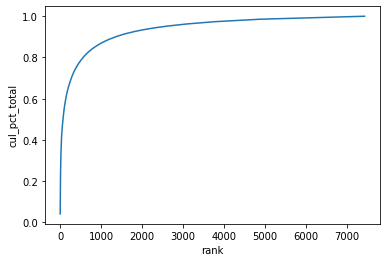

In [29]:
import seaborn as sns
sns.lineplot(x='rank', y='cul_pct_total', data=word_count);

# Vectorization

## Definitions

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Vectorization**: `Your Answer Here`

**Document Term Matrix (DTM)**: `Your Answer Here`

**Latent Semantic Analysis**: `Your Answer Here`

**Term Frequency - Inverse Document Frequency (TF-IDF)**: `Your Answer Here`

**Word Embedding**: `Your Answer Here`

**N-Gram**: `Your Answer Here`

**Skip-Gram**: `Your Answer Here`

## Questions of Understanding

1. Why do we need to vectorize our documents?
```
Your Answer Here
```

2. How is TF-IDF different from simple word frequency? Why do we use TF-IDF over word frequency?
```
Your Answer Here
```

3. Why might we choose a word embedding approach over a bag-of-words approach when it comes to vectorization?
```
Your Answer Here
```

## Practice Problems

Use the dataframe `df` above to complete the following.

Vectorize the `Tokens` column.

Build a Nearest Neighbors model from your dataframe and then find the 5 nearest neighbors to the strain "100-OG"

You will be putting together a classification model below, but before you do you'll need a baseline. Run the line of code below and then find the normalized value counts for the `Rating` column in `df`.

In [ ]:
df['Rating'] = df['Rating'].round().astype(int)

What is the baseline accuracy?
```
Your Answer Here
```

Visualize the rating counts from above

Use your vectorized tokens in the `df` dataframe to train a classification model

Predict the score of the fake strain description below.

```
'Afgooey, also known as Afgoo, is a potent indica strain that is believed to descend from an Afghani indica and Maui Haze. 
Its sativa parent may lend Afgoo some uplifting, creative qualities, but this strain undoubtedly takes after its indica 
parent as it primarily delivers relaxing, sleepy effects alongside its earthy pine flavor. Growers hoping to cultivate Afgoo 
may have a better chance of success indoors, but this indica can also thrive in Mediterranean climates outdoors.'
```

# Topic Modeling

## Questions of Understanding

1. What is Latent Dirichlet Allocation? What is another name for LDA in NLP?
```
Your Answer Here
```

2. How do interpret the results of a topic modeling output?
```
Your Answer Here
```

## Practice Problems

Find the top 5 topics of the `Description` column using LDA

In a short paragraph, explain how to interpret the first topic your model came up with. If your topic words are difficult to interpret, explain how you could clean up the descriptions to improve your topics

```
Your Answer Here
```

Use `pyLDAvis` to create a visualization to help you interpret your topic modeling results

Explain how to interpret the results of `pyLDAvis`

```
Your Answer Here
```

Create at least 1 more visualization to help you interpret the results of your topic modeling